**Graph with attachment files**

# Libraries and config

In [1]:
# built-in libs
import os
from pathlib import Path

# obsidiantools requirements
import numpy as np
import pandas as pd
import networkx as nx

# extra libs for this notebook (visualise graph)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip show obsidiantools

Name: obsidiantools
Version: 0.10.0
Summary: Obsidian Tools - a Python interface for Obsidian.md vaults
Home-page: https://github.com/mfarragher/obsidiantools
Author: Mark Farragher
Author-email: 
License: BSD
Location: /home/mark/miniconda3/envs/obsidian/lib/python3.11/site-packages
Requires: beautifulsoup4, bleach, html2text, lxml, markdown, networkx, numpy, pandas, pymdown-extensions, python-frontmatter
Required-by: 


## Vault directory

In [3]:
VAULT_DIR = Path().cwd() / 'vault-stub'

In [4]:
VAULT_DIR.exists()

True

## Obsidian tools

In [5]:
import obsidiantools.api as otools  # api shorthand

# Explore your vault

## Setup 😎

The `Vault` class is the object you need for exploring your vault.  Set up the object with the path to your directory.

- **CONNECT** is the method for connecting all your vault notes in a graph.
    - Once called, you will be able to access metadata and do analysis of your notes.
    - This needs to be called to get the essential structure of your vault, e.g. lookups for your notes, getting wikilinks, backlinks, etc.
- **GATHER** is the method for gathering all your vault notes' content.
    - Once called, you will be able to get plaintext content of individual notes and a master index of notes.
    - This needs to be called to get the content of your notes.  There is config that can be specified in the function, e.g. whether to keep code blocks.

In [6]:
ATTACHMENTS = True

In [7]:
vault = (otools.Vault(VAULT_DIR)
         .connect(attachments=ATTACHMENTS)
         .gather()
         )

Get all the detail on your notes & files:

In [8]:
df = vault.get_all_file_metadata()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Brevissimus moenia to Crazy wall.canvas
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rel_filepath      10 non-null     object        
 1   abs_filepath      10 non-null     object        
 2   file_exists       24 non-null     bool          
 3   n_backlinks       24 non-null     int64         
 4   n_wikilinks       8 non-null      float64       
 5   n_tags            8 non-null      float64       
 6   n_embedded_files  8 non-null      float64       
 7   modified_time     10 non-null     datetime64[ns]
 8   graph_category    24 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.7+ KB


First 5 items:

In [10]:
df.head()

,rel_filepath,abs_filepath,file_exists,n_backlinks,n_wikilinks,n_tags,n_embedded_files,modified_time,graph_category
file,,,,,,,,,
Brevissimus moenia,lipsum/Brevissimus moenia.md,/home/mark/Github/obsidiantools-demo/vault-stu...,True,1,3.0,0.0,0.0,2021-09-11 10:12:14.793214083,note
Tydides,NaN,NaN,False,1,NaN,NaN,NaN,NaT,nonexistent
Aras Teucras,NaN,NaN,False,1,NaN,NaN,NaN,NaT,nonexistent
Bacchus,NaN,NaN,False,5,NaN,NaN,NaN,NaT,nonexistent
Ne fuit,lipsum/Ne fuit.md,/home/mark/Github/obsidiantools-demo/vault-stu...,True,2,6.0,0.0,0.0,2022-12-24 16:28:38.878715754,note


## Visualise your vault

The Obsidian app should be where you explore your vault visually, for all the interactive benefits!

If you want to do network analysis of your vault, or else focus on a subgraph, then you can do analysis through the NetworkX graph object: `vault.graph`

In [11]:
colour_map = {'note': '#826ED9',
              'nonexistent': '#D3D3D3',
              'attachment': '#D6D470'}
node_colours_lookup = (df['graph_category']
                       .map(colour_map)
                       .to_dict())
node_colours_list = [node_colours_lookup.get(i)
                     for i in vault.graph.nodes()]

This in the legend for how nodes in the graph will appear in the visualisation:
- <span><img src="https://via.placeholder.com/15/826ED9/000000?text=+#left" alt="alt_text" align="left"/>: Note exists as a file</span>
- <span><img src="https://via.placeholder.com/15/D6D470/000000?text=+#left" alt="alt_text" align="left"/>: Attachment file</span>
- <span><img src="https://via.placeholder.com/15/D3D3D3/000000?text=+#left" alt="alt_text" align="left"/>: File doesn't exist</span>

**There are recipes shown here for two libraries:**
- **Matplotlib:** the main plotting library in Python.  Only used here to demonstrate appearance in a small vault.
- **Pyvis:** a plotting library with more advanced interactive functionality.

### Matplotlib

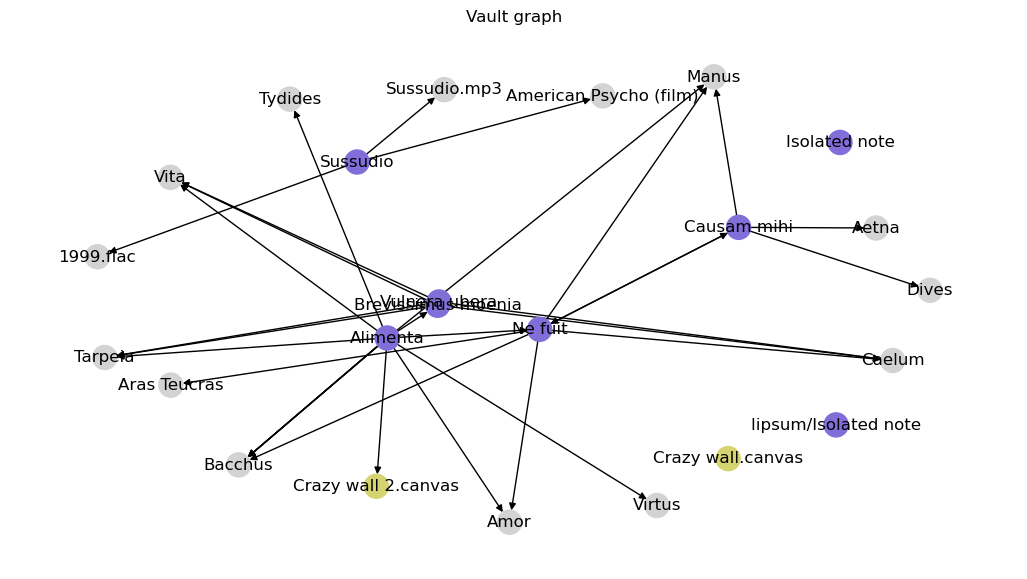

In [12]:
fig, ax = plt.subplots(figsize=(13,7))
nx.draw(vault.graph, node_color=node_colours_list, with_labels=True, ax=ax)
ax.set_title('Vault graph')
plt.show()

## Pyvis

The Pyvis code isn't run in the demo, but is included as a code snippet here.

```python
from pyvis.network import Network

# pyvis graph setup:
net = Network('500px', '800px', directed=True)
net.from_nx(vault.graph)
for node in net.nodes:
    node['color'] = node_colours_lookup.get(node['id'])

# graph stored in an interactive HTML file:
net.show('nx.html')
```

The HTML graph from Pyvis will look something like:

![Pyvis graph](/img/demo-vault_pyvis-graph-includes-attachments.png?raw=true "Pyvis graph")

Compare how it actually looks in the Obsidian app:

![Obsidian graph](/img/demo-vault_obsidian-app-actual-graph.png?raw=true "Obsidian app graph")